# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(10000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB
None


,review,sentiment
count,10000,10000
unique,9983,2
top,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
freq,2,5028


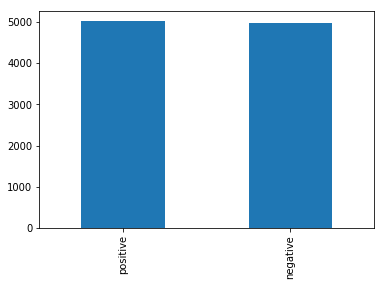

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:10000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:10000]
y_train=imdb_data.sentiment[:10000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

print(cm)
print("Accuracy :" , accuracy)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()

cr = classification_report(y_train, y_pred)
print(cr, cv)

[[4709  263]
 [ 568 4460]]
Accuracy : 0.9169
              precision    recall  f1-score   support

    negative       0.89      0.95      0.92      4972
    positive       0.94      0.89      0.91      5028

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000
 0.8386241178720582


In [8]:
X_test=imdb_data.review[10000:11000]
y_test=imdb_data.sentiment[10000:11000]


X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)
y_test=y_test.values.tolist()


cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)

print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





              precision    recall  f1-score   support

    negative       0.83      0.86      0.84       534
    positive       0.83      0.80      0.81       466

   micro avg       0.83      0.83      0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000


Confusion Matrix : 
 [[458  76]
 [ 94 372]]
Accuracy : 0.83
__________________________________________________________________________________________________


In [9]:
X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_train = tokenize(X_train)
X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

y_pred_fromtest2=pipe.predict(X_test2)
print(len(y_test2))
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")







5000
              precision    recall  f1-score   support

    negative       0.83      0.86      0.84      2463
    positive       0.86      0.82      0.84      2537

   micro avg       0.84      0.84      0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000


Confusion Matrix : 
 [[2114  349]
 [ 446 2091]]
Accuracy : 0.841
__________________________________________________________________________________________________


In [15]:
X = cvec.fit_transform(X_train)

In [20]:
cvec.get_feature_names()


['aa',
 'aaa',
 'aaaarrgh',
 'aaah',
 'aaall',
 'aaargh',
 'aaaugh',
 'aag',
 'aaghh',
 'aah',
 'aaip',
 'aak',
 'aaliyah',
 'aam',
 'aamir',
 'aap',
 'aapkey',
 'aardman',
 'aaron',
 'aarp',
 'aashok',
 'aatish',
 'aawip',
 'ab',
 'aback',
 'abandon',
 'abash',
 'abba',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abbrevi',
 'abc',
 'abdalla',
 'abdic',
 'abdomen',
 'abduct',
 'abductor',
 'abe',
 'abel',
 'abemethi',
 'abernathi',
 'abernethi',
 'aberr',
 'aberystwyth',
 'abet',
 'abhay',
 'abhimaan',
 'abhisheh',
 'abhishek',
 'abhor',
 'abhorr',
 'abi',
 'abid',
 'abigail',
 'abil',
 'abingdon',
 'abishag',
 'abit',
 'abject',
 'abjectli',
 'abl',
 'ablaz',
 'abli',
 'abner',
 'abnorm',
 'aboard',
 'abod',
 'abolish',
 'abolit',
 'abolitiong',
 'abolitionist',
 'abomin',
 'aboooot',
 'aborigin',
 'abort',
 'abortionist',
 'abound',
 'abr',
 'abra',
 'abracadabrantesqu',
 'abraham',
 'abram',
 'abreast',
 'abridg',
 'abril',
 'abroad',
 'abrupt',
 'abruptli',
 'absalom',
 'abscess',
 '

In [21]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)